In [ ]:
cd /content/drive/MyDrive/HK201/BTL_TGM/Pytorch

/content/drive/MyDrive/HK201/BTL_TGM/Pytorch


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import model
import cv2
import os
import cv2
from PIL import Image
import re

In [ ]:
from model import core, utils, config

In [ ]:
pip install -r requirements.txt

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
dataset = core.Dataset('/content/drive/My Drive/HK201/BTL_TGM/Pytorch/data_28_11')

In [ ]:
dir_preprocessed = '/content/drive/MyDrive/HK201/BTL_TGM/Pytorch'
label_data.to_csv(os.path.join(dir_preprocessed,"label_data.csv"),index=False)

In [ ]:
model_object = torch.load('test_2_12.pt')

In [ ]:
def read_image(path):
  image = cv2.imread(path)
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

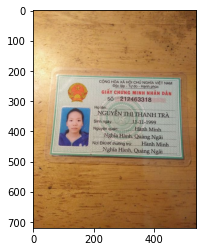

In [ ]:
fname = 'new_data/test/cmnd_test_008.jpg'
image = read_image(fname)
plt.imshow(image)

In [ ]:
def non_max_suppression(boxes, scores, labels):
  br_index = labels.index("bottom_right")
  bl_index = labels.index("bottom_left")
  tr_index = labels.index("top_right")
  tl_index = labels.index("top_left")
  final_labels = np.array([labels[br_index], labels[bl_index], labels[tr_index], labels[tl_index]]).tolist()
  final_scores = torch.cat((scores[br_index].unsqueeze(0), scores[bl_index].unsqueeze(0), scores[tr_index].unsqueeze(0), scores[tl_index].unsqueeze(0)), 0)
  final_boxes = torch.cat((boxes[br_index,:].unsqueeze(0), boxes[bl_index, :].unsqueeze(0), boxes[tr_index, :].unsqueeze(0), boxes[tl_index, :].unsqueeze(0)), 0)
  return final_boxes, final_labels, final_scores

In [ ]:
def get_center_point(box):
    xmin, ymin, xmax, ymax = box
    return (xmin + xmax) // 2, (ymin + ymax) // 2

In [ ]:
def perspective_transform(image, source_points):
    dest_points = np.float32([[0,0], [500,0], [500,300], [0,300]])
    M = cv2.getPerspectiveTransform(source_points, dest_points)
    dst = cv2.warpPerspective(image, M, (500, 300))
    
    return dst

In [ ]:
def crop_img(image_original):
  image = image_original
  plt.imshow(image)
  labels, boxes, scores = model_object.predict_object(image)
  final_boxes, final_labels, final_scores = non_max_suppression(boxes, scores, labels)
  final_points = list(map(get_center_point, final_boxes))
  label_boxes = dict(zip(final_labels, final_points))
  source_points = np.float32([
    label_boxes['top_left'], label_boxes['top_right'], label_boxes['bottom_right'], label_boxes['bottom_left']
  ])
  # Transform 
  crop = perspective_transform(image, source_points)
  plt.imsave('output.jpg', crop)
  return crop

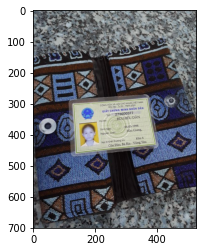

In [49]:
image_original = cv2.imread('new_data/test/cmnd_test_020.jpg')
plt.imshow(image_original)

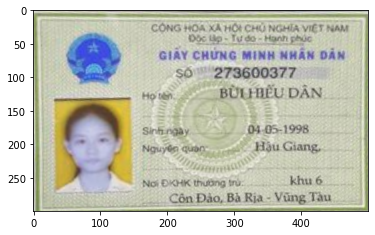

In [50]:
image = crop_img(image_original)
plt.imshow(image)

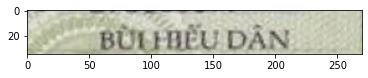

In [51]:
img = image[100:135, 220:490, :]
plt.imshow(img)
plt.imsave('ten_output.jpg', img)

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [ ]:
detector = Predictor(config)

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmp3fsxoguc/dl
152MB [00:00, 172MB/s]


BÙI HIẾU DÂN


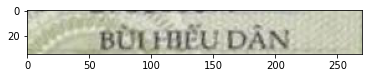

In [52]:
img = '/content/drive/MyDrive/HK201/BTL_TGM/Pytorch/ten_output.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
print(s)

In [ ]:
def get_name_text(image):
  hang1_img = image[100:135, 220:490, :]
  hang1_img = cv2.resize(hang1_img, dsize = None, fx = 2, fy = 2)
  hang1_gray = cv2.cvtColor(hang1_img, cv2.COLOR_BGR2GRAY)
  hang1_gray = cv2.medianBlur(hang1_gray,3)
  hang1_gray = cv2.equalizeHist(hang1_gray)
  th, hang1_threshold = cv2.threshold(hang1_gray, 20, 255, cv2.THRESH_BINARY_INV)
  kernel = np.ones((3,3), np.uint8)
  hang1_dilate = cv2.dilate(hang1_threshold,kernel)
  hang1_results = pytesseract.image_to_string(hang1_dilate, lang='vie', config='--psm 7')

  hang2_img = image[130:160, 160:480, :]
  hang2_img = cv2.resize(hang2_img, dsize = None, fx = 2, fy = 2)
  hang2_gray = cv2.cvtColor(hang2_img, cv2.COLOR_BGR2GRAY)
  hang2_gray = cv2.medianBlur(hang2_gray,3)
  hang2_gray = cv2.equalizeHist(hang2_gray)
  th, hang2_threshold = cv2.threshold(hang2_gray, 20, 255, cv2.THRESH_BINARY_INV)
  kernel = np.ones((3,3), np.uint8)
  hang2_dilate = cv2.dilate(hang2_threshold,kernel)
  hang2_results = pytesseract.image_to_string(hang2_dilate, lang='vie', config='--psm 7')

  return (re.sub(r'[^\w\s ]', '', hang1_results+hang2_results))

In [ ]:
def get_id_text(image):
  id_img = image[70:110, 240:420, :]
  id_img = cv2.resize(id_img, dsize = None, fx = 2, fy = 2)
  gray = cv2.cvtColor(id_img, cv2.COLOR_BGR2GRAY)
  gray = cv2.equalizeHist(gray)
  th, threshold = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY_INV)
  kernel = np.ones((3,3), np.uint8)
  dilate = cv2.dilate(threshold,kernel)
  results = pytesseract.image_to_string(dilate)
  return results

In [ ]:
def get_dob_text(image):
  dob_img = image[160:190, 290:440, :]
  dob_img = cv2.resize(dob_img, dsize = None, fx = 2, fy = 2)
  gray = cv2.cvtColor(dob_img, cv2.COLOR_BGR2GRAY)
  gray = cv2.equalizeHist(gray)
  th, threshold = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY_INV)
  kernel = np.ones((3,3), np.uint8)
  dilate = cv2.dilate(threshold,kernel)
  results = pytesseract.image_to_string(dilate)
  return results

NGUYÊN GIÁ HƯNGTW ÐĐB

as Byatt


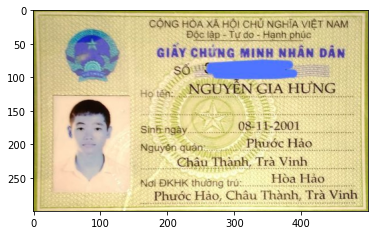

In [ ]:
image_original = cv2.imread('new_data/test/cmnd_test_022.jpg')
image_crop = crop_img(image_original)
plt.imshow(image_crop)
print(get_name_text(image_crop))
print(get_id_text(image_crop))
print(get_dob_text(image_crop))

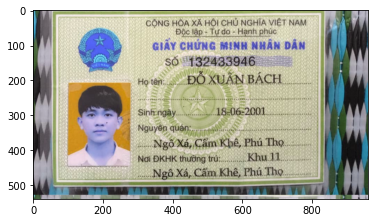

In [ ]:
image_original = cv2.imread('new_data/test/cmnd_test_030.jpg')
plt.imshow(image_original)

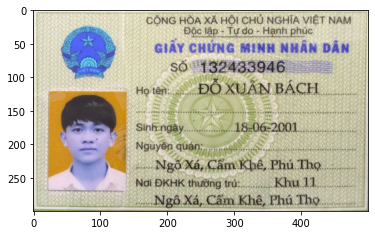

In [ ]:
image = crop_img(image_original)
plt.imshow(image)

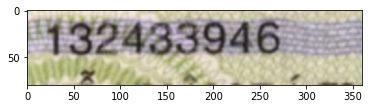

In [ ]:
id_img = image[70:110, 240:420, :]
id_img = cv2.resize(id_img, dsize = None, fx = 2, fy = 2)
plt.imsave('id_img.jpg', id_img)
plt.imshow(id_img)

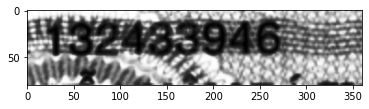

In [ ]:
gray = cv2.cvtColor(id_img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
plt.imshow(gray, cmap='gray')

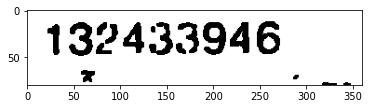

In [ ]:
th, threshold = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((3,3), np.uint8)
dilate = cv2.dilate(threshold,kernel)
plt.imshow(dilate, cmap='binary')

In [ ]:
results = pytesseract.image_to_string(dilate)
print(results)

132433946


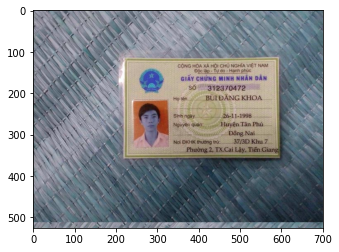

In [ ]:
image_original = cv2.imread('new_data/test/cmnd_test_037.jpg')
plt.imshow(image_original)

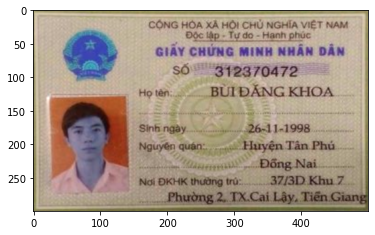

In [ ]:
image = crop_img(image_original)
plt.imshow(image)

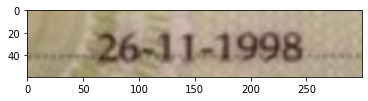

In [ ]:
day_img = image[160:190, 290:440, :]
day_img = cv2.resize(day_img, dsize = None, fx = 2, fy = 2)
plt.imsave('id_img.jpg', day_img)
plt.imshow(day_img)

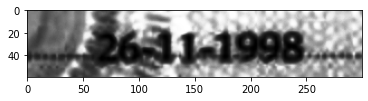

In [ ]:
gray = cv2.cvtColor(day_img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
plt.imshow(gray, cmap='gray')

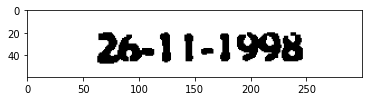

In [ ]:
th, threshold = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((3,3), np.uint8)
dilate = cv2.dilate(threshold,kernel)
plt.imshow(dilate, cmap='binary')

In [ ]:
results = pytesseract.image_to_string(dilate)
print(results)

26-11-1998
